In [1]:
import sys

from pyspark.sql import SparkSession
from pyspark.sql.functions import count
from pyspark.sql.functions import max, min, col

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

import numpy as np
import pandas as pd

from graphframes import *
from pyspark.sql.types import *
from graphframes import *

import networkx as nx

In [2]:
# Load external packages programatically
# Here, we assume that you use Spark 3.0.1 or later (compiled against Scala 2.12)
import os
packages = "graphframes:graphframes:0.8.1-spark3.0-s_2.12"
# jars = "graphframes-0.3.0-spark2.0-s_2.11.jar"

os.environ["PYSPARK_SUBMIT_ARGS"] = (
    "--repositories https://repos.spark-packages.org/ --packages {0} pyspark-shell".format(packages)
)
#os.environ["PYSPARK_SUBMIT_ARGS"] = (
#    "--packages {0} --jars {1} pyspark-shell".format(packages, jars)
#)

In [3]:
spark = (SparkSession     
         .builder     
         .appName("Stackoverflow")     
         .getOrCreate())

In [4]:
stack_nodes_df = (spark.read.format("csv")      
          .option("header", "true")      
          .option("inferSchema", "true")      
          .load("data/stack_network_nodes.csv"))

In [5]:
stack_links_df = (spark.read.format("csv")      
          .option("header", "true")      
          .option("inferSchema", "true")      
          .load("data/stack_network_links.csv"))

In [6]:
count_stack_df_1 = (stack_nodes_df     
                .select(col("id").alias("PopularTopic"), "nodesize")      
                .groupBy("PopularTopic")      
                .agg(max("nodesize").alias("nodesize"))      
                .orderBy("nodesize", ascending=False))

In [7]:
count_stack_df_1.show(n=60, truncate=False)   
print("Total Rows = %d" % (count_stack_df_1.count()))

+-------------------+--------+
|PopularTopic       |nodesize|
+-------------------+--------+
|javascript         |649.16  |
|java               |610.65  |
|python             |438.67  |
|php                |361.22  |
|css                |341.17  |
|c#                 |321.13  |
|html               |272.45  |
|c++                |268.11  |
|android            |229.86  |
|jquery             |208.29  |
|c                  |189.83  |
|mysql              |165.43  |
|sql                |154.23  |
|html5              |140.18  |
|asp.net            |129.55  |
|angularjs          |126.59  |
|node.js            |117.36  |
|linux              |108.54  |
|ios                |87.46   |
|.net               |75.08   |
|ruby               |70.14   |
|sql-server         |64.62   |
|swift              |63.62   |
|reactjs            |59.03   |
|ruby-on-rails      |55.31   |
|git                |54.48   |
|spring             |52.84   |
|r                  |52.7    |
|mongodb            |50.95   |
|objecti

In [8]:
count_stack_df_2 = (stack_nodes_df     
                .select(col("id").alias("LessPopularTopic"), "nodesize")      
                .groupBy("LessPopularTopic")      
                .agg(min("nodesize").alias("nodesize"))      
                .orderBy("nodesize", ascending=True))
print("Total Rows = %d" % (count_stack_df_2.count()))

Total Rows = 115


In [9]:
count_stack_df_2.show(n=60, truncate=False)   
print("Total Rows = %d" % (count_stack_df_2.count()))

+-------------------+--------+
|LessPopularTopic   |nodesize|
+-------------------+--------+
|drupal             |8.25    |
|linq               |8.32    |
|vue.js             |8.38    |
|ionic-framework    |8.44    |
|redux              |8.52    |
|api                |8.61    |
|testing            |8.95    |
|flask              |9.39    |
|tdd                |9.45    |
|regex              |9.46    |
|nginx              |9.49    |
|less               |9.73    |
|devops             |9.81    |
|powershell         |9.85    |
|jenkins            |10.02   |
|twitter-bootstrap-3|10.13   |
|maven              |10.3    |
|plsql              |10.32   |
|qt                 |10.53   |
|cloud              |10.66   |
|elasticsearch      |10.82   |
|mvc                |10.92   |
|apache-spark       |11.04   |
|xamarin            |11.18   |
|haskell            |11.18   |
|asp.net-web-api    |11.28   |
|xcode              |11.37   |
|excel-vba          |11.38   |
|eclipse            |11.39   |
|shell  

In [10]:
df_nodes = pd.read_csv('data/stack_network_nodes.csv', header=None)

In [11]:
df_nodes.head()

,0,1,2
0,id,group,nodesize
1,html,6,272.45
2,css,6,341.17
3,hibernate,8,29.83
4,spring,8,52.84


In [12]:
df_links = pd.read_csv('data/stack_network_links.csv', header=None)

In [13]:
df_links.head()

,0,1,2,3
0,id,src,dst,value
1,1,azure,.net,20.933192346640457
2,2,sql-server,.net,32.322524219339904
3,3,asp.net,.net,48.40702996199019
4,4,entity-framework,.net,24.37090250532431


In [14]:
def create_stackoverflow_graph():
    nodes = spark.read.csv("data/stack_network_nodes.csv", header=True)
    relationships = spark.read.csv("data/stack_network_links.csv", header=True)
    return GraphFrame(nodes, relationships)

In [15]:
g = create_stackoverflow_graph()

In [16]:
print(g)

GraphFrame(v:[id: string, group: string ... 1 more field], e:[src: string, dst: string ... 2 more fields])


In [17]:
gpvertices = g.vertices.toPandas()

In [18]:
g.vertices.show()

+-------------+-----+--------+
|           id|group|nodesize|
+-------------+-----+--------+
|         html|    6|  272.45|
|          css|    6|  341.17|
|    hibernate|    8|   29.83|
|       spring|    8|   52.84|
|         ruby|    3|   70.14|
|ruby-on-rails|    3|   55.31|
|          ios|    4|   87.46|
|        swift|    4|   63.62|
|        html5|    6|  140.18|
|            c|    1|  189.83|
|          c++|    1|  268.11|
|      asp.net|    2|  129.55|
|           c#|    2|  321.13|
|  objective-c|    4|   47.01|
|   javascript|    6|  649.16|
|       jquery|    6|  208.29|
|        redux|    3|    8.52|
|      reactjs|    3|   59.03|
|          php|    6|  361.22|
|        mysql|    6|  165.43|
+-------------+-----+--------+
only showing top 20 rows



In [19]:
g.edges.show()

+---+----------------+-------------------+------------------+
| id|             src|                dst|             value|
+---+----------------+-------------------+------------------+
|  1|           azure|               .net|20.933192346640457|
|  2|      sql-server|               .net|32.322524219339904|
|  3|         asp.net|               .net| 48.40702996199019|
|  4|entity-framework|               .net| 24.37090250532431|
|  5|             wpf|               .net| 32.35092522005943|
|  6|            linq|               .net|20.501743858149066|
|  7|             wcf|               .net|28.074400427611113|
|  8|              c#|               .net|62.167895042923824|
|  9|             tdd|              agile|37.146589924204555|
| 10|     codeigniter|               ajax| 23.19190040565183|
| 11|          jquery|               ajax| 50.56672861589973|
| 12|           mysql|               ajax| 24.80008942291756|
| 13|             css|               ajax|26.613713724688935|
| 14|   

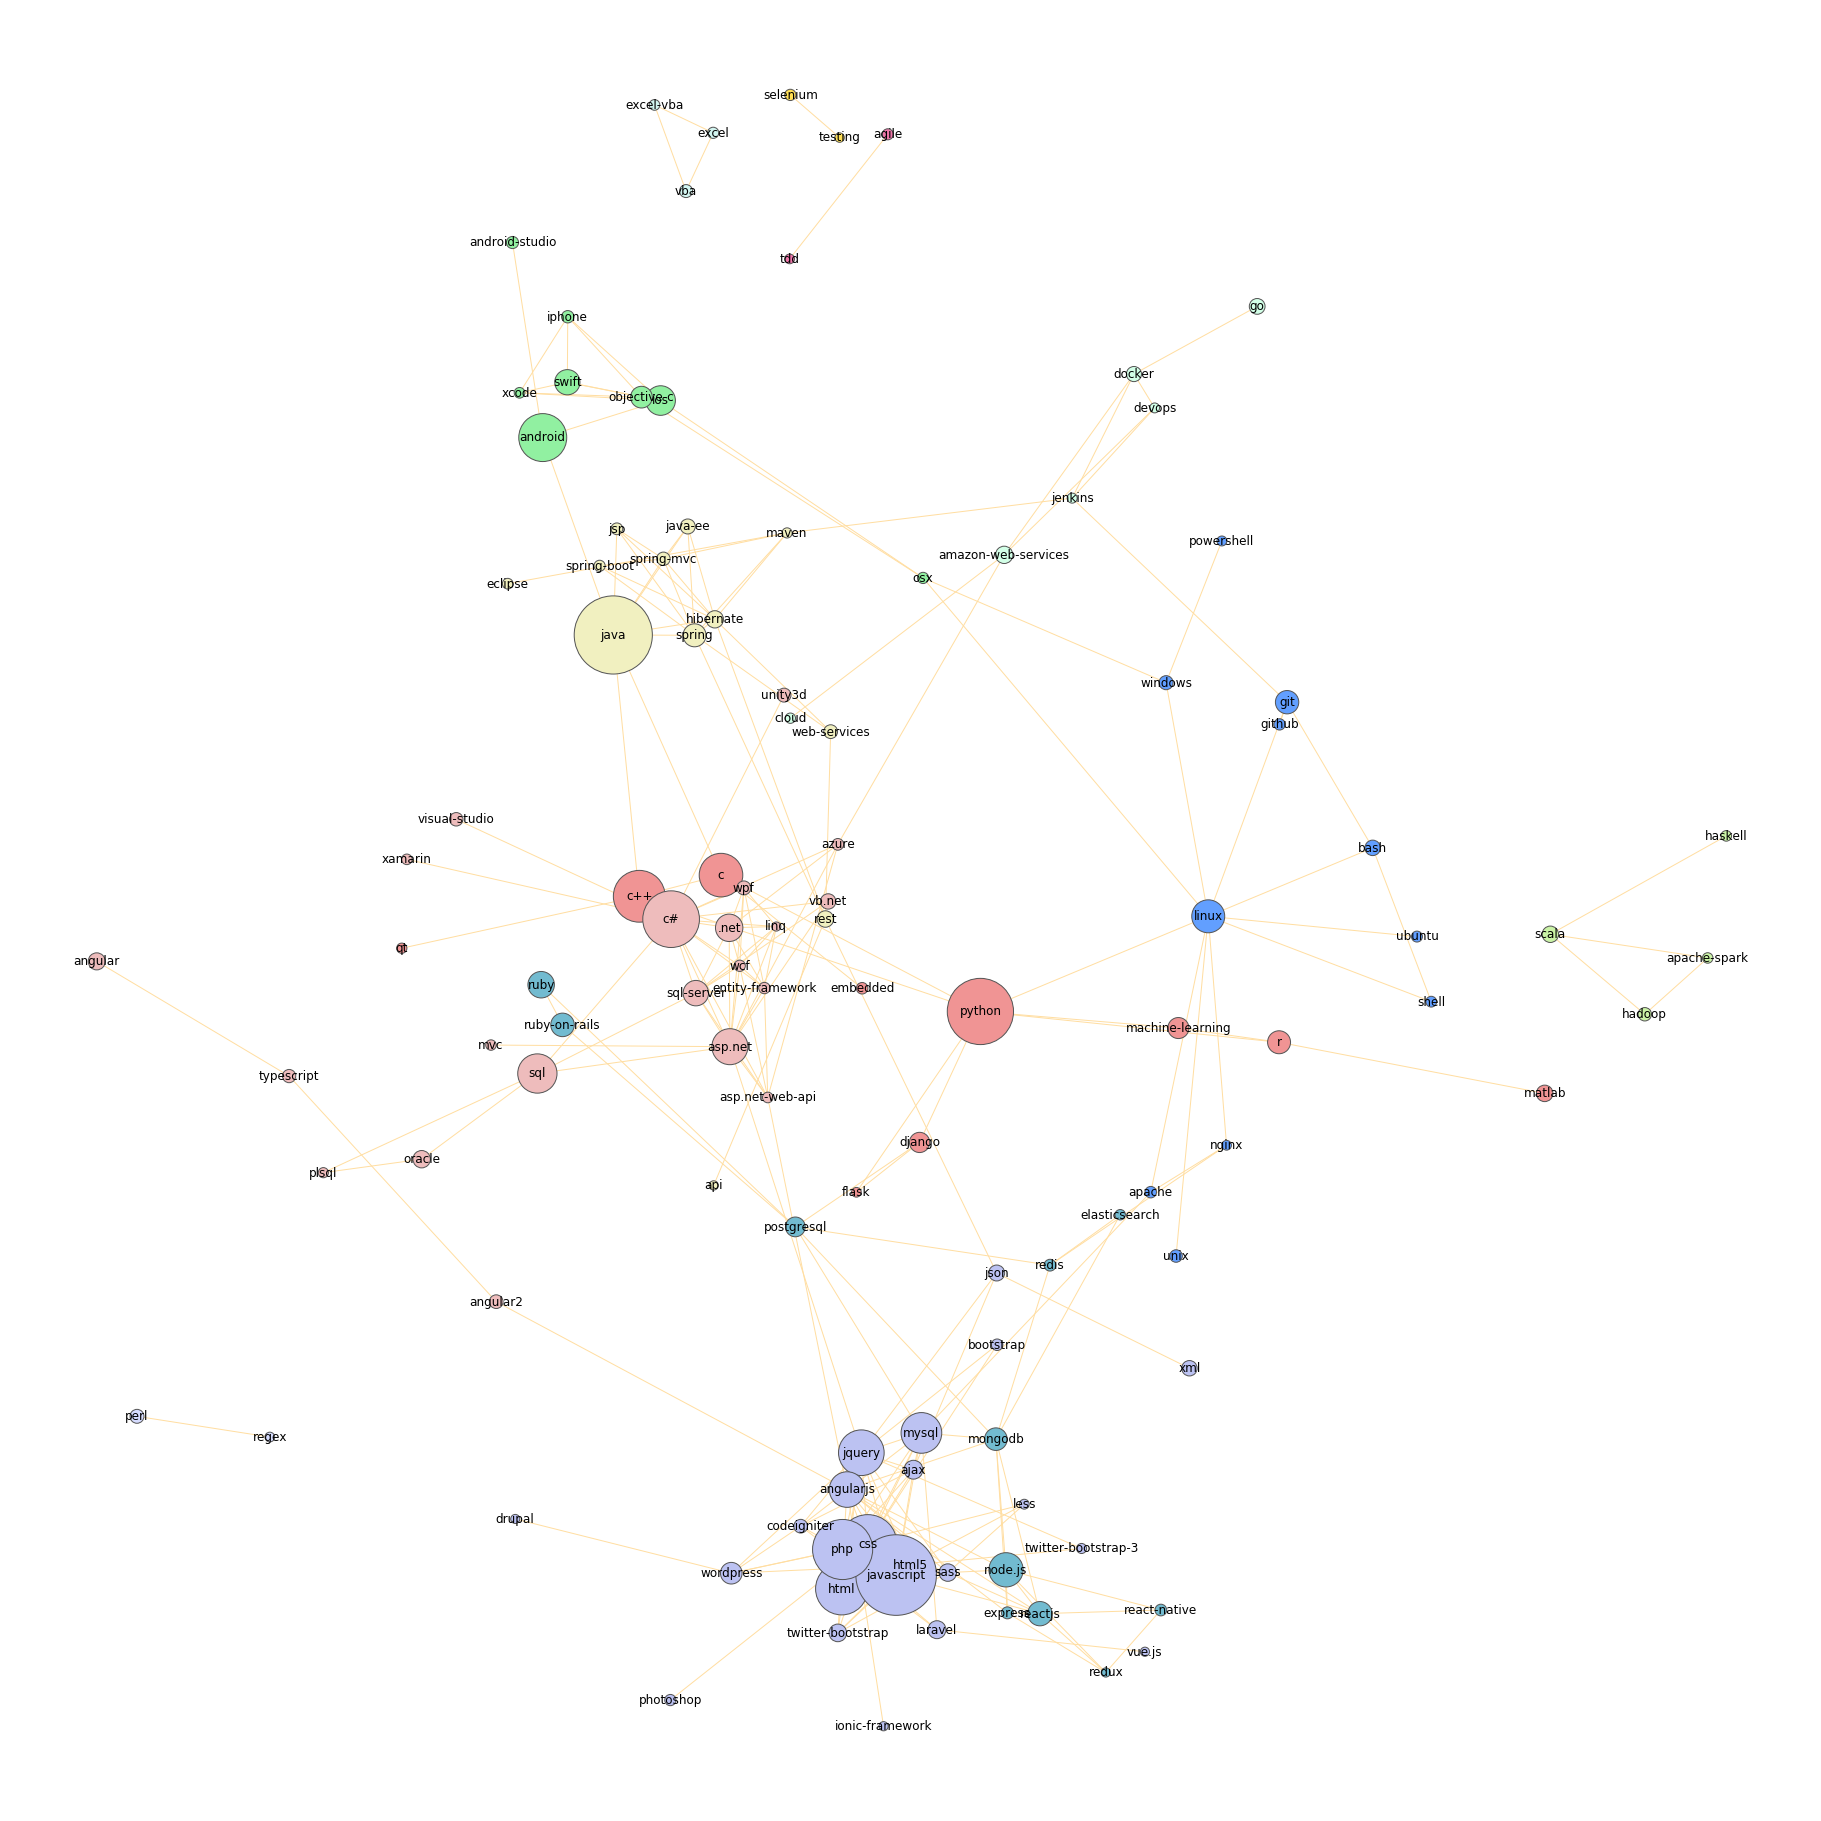

In [20]:
G = nx.Graph()
df_nodes = pd.read_csv('data/stack_network_nodes.csv')
df_edges = pd.read_csv('data/stack_network_links2.csv')

for index, row in df_nodes.iterrows():
    G.add_node(row["id"], name=row["id"], group=row["group"], nodesize=row["nodesize"])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row["source"], row["target"], row["value"])])
    
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

colors = [color_map[G.nodes[node]['group']] for node in G]
sizes = [G.nodes[node]['nodesize']*10 for node in G]

nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.80, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()

In [21]:
g.inDegrees.show()

+----------------+--------+
|              id|inDegree|
+----------------+--------+
|              qt|       1|
|          iphone|       4|
|            unix|       1|
|          devops|       3|
|        embedded|       1|
|           azure|       5|
|           xcode|       4|
|         android|       3|
|        angular2|       2|
|       bootstrap|       2|
|      postgresql|       6|
|         angular|       1|
|         haskell|       1|
|      powershell|       1|
|machine-learning|       2|
|           redux|       4|
|             osx|       4|
|          ubuntu|       1|
|         node.js|       7|
|              c#|      14|
+----------------+--------+
only showing top 20 rows



In [22]:
g.inDegrees.filter("inDegree >= 5").sort('inDegree', ascending=False).show()

+----------------+--------+
|              id|inDegree|
+----------------+--------+
|          jquery|      16|
|              c#|      14|
|             css|      14|
|         asp.net|      13|
|       angularjs|      13|
|           mysql|      11|
|      javascript|      11|
|             php|      10|
|           html5|      10|
|           linux|      10|
|            sass|       9|
|          spring|       9|
|       hibernate|       9|
|      sql-server|       9|
|             wcf|       8|
|            .net|       8|
|entity-framework|       8|
|         reactjs|       8|
|         mongodb|       8|
|            java|       8|
+----------------+--------+
only showing top 20 rows



In [23]:
gindegrees = g.inDegrees.filter("inDegree >= 5").sort('inDegree', ascending=False).toPandas().head()

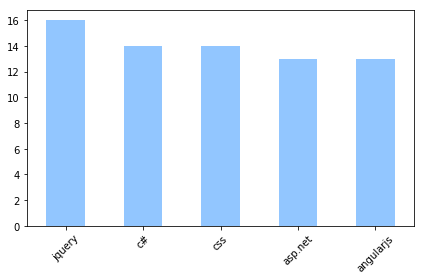

In [24]:
plt.style.use('seaborn-pastel')
ax = gindegrees.plot(kind='bar', x='id', y='inDegree', legend=None)
ax.xaxis.set_label_text("")
plt.yscale("linear")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
gindegreestail = g.inDegrees.sort('inDegree', ascending=False).toPandas().tail()

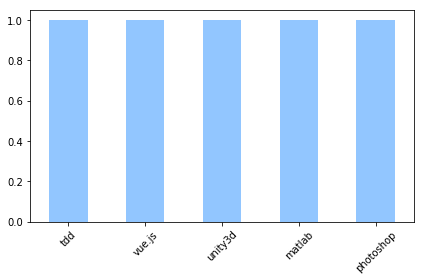

In [26]:
plt.style.use('seaborn-pastel')
ax = gindegreestail.plot(kind='bar', x='id', y='inDegree', legend=None)
ax.xaxis.set_label_text("")
plt.yscale("linear")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
results = g.pageRank(resetProbability=0.15, tol=0.01)
results.edges.select("src", "dst", "weight").show()

+-----------------+---------------+-------------------+
|              src|            dst|             weight|
+-----------------+---------------+-------------------+
|          java-ee|           java|               0.25|
|             json|         jquery|               0.25|
|            html5|     javascript| 0.1111111111111111|
|            html5|            php| 0.1111111111111111|
|              wcf|            wpf|              0.125|
|          asp.net|            wpf|0.07692307692307693|
|       typescript|        angular|                0.5|
|        angularjs|asp.net-web-api|0.07692307692307693|
|          java-ee|      hibernate|               0.25|
|          node.js|        reactjs|0.14285714285714285|
|             java|     spring-mvc|              0.125|
|              php|            css|                0.1|
|           iphone|          xcode|               0.25|
|             .net|          azure|              0.125|
|twitter-bootstrap|          html5|0.16666666666

In [28]:
results = g.pageRank(resetProbability=0.15, tol=0.01)
results.vertices.select("id", "PageRank").sort('PageRank', ascending=False).show()

+----------+------------------+
|        id|          PageRank|
+----------+------------------+
|     linux|2.7906672644518746|
|    jquery| 2.513724545860744|
|        c#|2.4128014355226903|
| angularjs| 2.213680026434017|
|       css|2.1846395469526954|
|   asp.net| 2.100635920912717|
|    python| 2.008879367714944|
|    spring|1.9087774565460358|
| hibernate|1.8895818021232351|
|     mysql|1.8751825228493302|
|      java|1.8475503880440314|
|javascript|1.7005993746855077|
|       php|1.6036981533751555|
|     html5|1.5504734066180004|
|   mongodb|1.5167378169235708|
|spring-mvc|1.4975603921717482|
|     scala| 1.493967459332789|
|       ios|1.4852062566919497|
|sql-server|1.4592884505464236|
|postgresql| 1.437945422455678|
+----------+------------------+
only showing top 20 rows



In [29]:
gpagerank = results.vertices.select("id", "PageRank").sort('PageRank', ascending=False).toPandas().head()

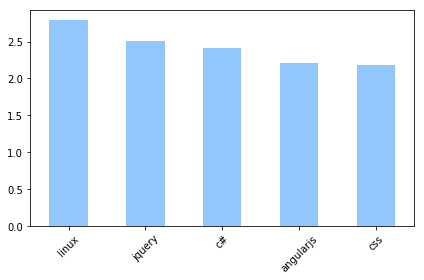

In [30]:
plt.style.use('seaborn-pastel')
ax = gpagerank.plot(kind='bar', x='id', y='PageRank', legend=None)
ax.xaxis.set_label_text("")
plt.yscale("linear")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
gpageranktail = results.vertices.select("id", "PageRank").sort('PageRank', ascending=False).toPandas().tail()

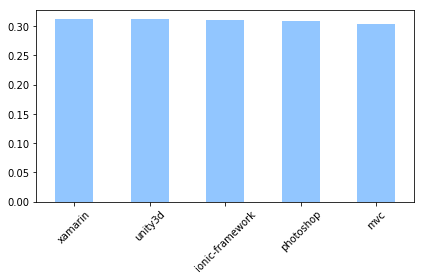

In [32]:
plt.style.use('seaborn-pastel')
ax = gpageranktail.plot(kind='bar', x='id', y='PageRank', legend=None)
ax.xaxis.set_label_text("")
plt.yscale("linear")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
results = g.shortestPaths(landmarks=["java", "python"])
results.select("id", "distances").show()

+----------------+--------------------+
|              id|           distances|
+----------------+--------------------+
|           plsql|[java -> 7, pytho...|
|      postgresql|[java -> 4, pytho...|
|              go|[java -> 5, pytho...|
|   visual-studio|[java -> 7, pytho...|
|              qt|[java -> 2, pytho...|
|     spring-boot|[java -> 2, pytho...|
|           scala|                  []|
|               r|[java -> 3, pytho...|
|entity-framework|[java -> 6, pytho...|
|            ajax|[java -> 4, pytho...|
|           maven|[java -> 2, pytho...|
|          ubuntu|[java -> 4, pytho...|
|            html|[java -> 5, pytho...|
|             wcf|[java -> 6, pytho...|
|         asp.net|[java -> 5, pytho...|
|          iphone|[java -> 3, pytho...|
|       wordpress|[java -> 5, pytho...|
|           html5|[java -> 5, pytho...|
|             vba|                  []|
|          oracle|[java -> 7, pytho...|
+----------------+--------------------+
only showing top 20 rows



In [34]:
degree_centrality = nx.degree_centrality(G)
top_degree_centrality = sorted(degree_centrality.items(),key=lambda x:x[1],reverse=True)[0:10]

top_degree_centrality

[('jquery', 0.14035087719298245),
 ('css', 0.12280701754385964),
 ('c#', 0.12280701754385964),
 ('asp.net', 0.11403508771929824),
 ('angularjs', 0.11403508771929824),
 ('javascript', 0.10526315789473684),
 ('mysql', 0.09649122807017543),
 ('html5', 0.08771929824561403),
 ('php', 0.08771929824561403),
 ('linux', 0.08771929824561403)]

In [35]:
betweenness_centrality = nx.betweenness_centrality(G)
top_betweenness_centrality = sorted(betweenness_centrality.items(),key=lambda x:x[1],reverse=True)[0:10]
top_betweenness_centrality

[('jquery', 0.2555399753457234),
 ('linux', 0.20840160874161803),
 ('mysql', 0.1976931477327379),
 ('asp.net', 0.17406690608353667),
 ('apache', 0.13087186063431988),
 ('json', 0.12319763505138448),
 ('angularjs', 0.12286762799187795),
 ('rest', 0.11370118004957315),
 ('python', 0.11018306022497917),
 ('postgresql', 0.08761830339613291)]

In [36]:
closeness_centrality = nx.closeness_centrality(G)
top_closeness_centrality = sorted(closeness_centrality.items(),key=lambda x:x[1],reverse=True)[0:10]

top_closeness_centrality

[('jquery', 0.2895872367001647),
 ('mysql', 0.2778958265228288),
 ('ajax', 0.2586198154345401),
 ('css', 0.25787451337276907),
 ('javascript', 0.2571334946561807),
 ('angularjs', 0.2571334946561807),
 ('apache', 0.2549357724796321),
 ('php', 0.2513552138773901),
 ('html', 0.2471891053600853),
 ('asp.net', 0.24650814363733023)]

In [37]:
#spark.stop()